# Проект: Обучение с учителем: качество модели

Репозиторий: https://github.com/iuhgcx/sup_learn

## Формулировка задачи

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:

Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
2) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

---

## Описание данных

**market_file.csv - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.**

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.**
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.**
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

---

## План работы

- [**Открыть файлы с данными, рассмотреть общую информацию о них.**](#chapter1)
- [**Проверить данные на наличие дубликатов и пропусков, сделать необходимую предобработку данных.**](#chapter2)
- [**Построить диаграммы для всех признаков, провести анализ, решить проблемы с выбросами и аномалиями.**](#chapter3)
- [**Объединить таблицы с учетом их особенностей.**](#chapter4)
- [**Провести корреляционный анализ признаков, изучить их взаимосвязь.**](#chapter5)
- [**Используя пайплайны, обучить несколько моделей, проварьировав их параметры, узнать лучшую модель.**](#chapter6)
- [**Проанализировать важность признаков.**](#chapter7)
- [**Провести сегментацию покупателей и проанализировать сегмент, дать рекомендации.**](#chapter8)
- [**Сделать общий вывод.**](#chapter9)

---

**Делаю необходимые для работы импорты.**

In [1]:
import os #Для указания правильных путей к файлам
import pandas as pd #Для работы с датасетами
import matplotlib.pyplot as plt #Для работы с графиками
import numpy as np #Для работы с формулами и числами
import seaborn as sns #Для построения тепловых карт и ящиков с усами
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline #Для использования пайплайнов
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    StandardScaler,
    MinMaxScaler, 
    RobustScaler) #Классы для кодирования категориальных данных и масштабирования количественных данных
from sklearn.compose import ColumnTransformer # Для работы с данными разного типа в одном наборе
from sklearn.metrics import roc_auc_score # Для работы с метрикой ROC-AUC
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.neighbors import KNeighborsClassifier # Метод k ближайших соседей
from sklearn.tree import DecisionTreeClassifier # Дерево решений
from sklearn.svm import SVC # Метод опорных векторов
from imblearn.over_sampling import RandomOverSampler # Для оверсэмплинга при дисбалансе классов
import shap # Для анализа важности признаков
from phik import phik_matrix
from phik.report import plot_correlation_matrix

## Загрузка данных <a class="anchor" id="chapter1"></a>

In [2]:
pth1_market_file = 'market_file.csv'
pth2_market_file = './market_file.csv'
pth3_market_file = 'https://code.s3.yandex.net/datasets/market_file.csv'
if os.path.exists(pth1_market_file):
    market_file = pd.read_csv(pth1_market_file, sep=',')
elif os.path.exists(pth2_market_file):
    market_file = pd.read_csv(pth2_market_file, sep=',')
elif os.path.exists(pth3_market_file):
    market_file = pd.read_csv(pth3_market_file, sep=',')
else:
    print('Something is wrong')
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


**При первой загрузке выяснилось, что разделитель - запятая, поэтому использую его.**

**Аналогично загружаю остальные датасеты.**

In [3]:
pth1_market_money = 'market_money.csv'
pth2_market_money = './market_money.csv'
pth3_market_money = 'https://code.s3.yandex.net/datasets/market_money.csv'
if os.path.exists(pth1_market_money):
    market_money = pd.read_csv(pth1_market_money, sep=',')
elif os.path.exists(pth2_market_money):
    market_money = pd.read_csv(pth2_market_money, sep=',')
elif os.path.exists(pth3_market_money):
    market_money = pd.read_csv(pth3_market_money, sep=',')
else:
    print('Something is wrong')
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [4]:
pth1_market_time = 'market_time.csv' 
pth2_market_time = './market_time.csv'
pth3_market_time = 'https://code.s3.yandex.net/datasets/market_time.csv'
if os.path.exists(pth1_market_time):
    market_time = pd.read_csv(pth1_market_time, sep=',')
elif os.path.exists(pth2_market_time):
    market_time = pd.read_csv(pth2_market_time, sep=',')
elif os.path.exists(pth3_market_time):
    market_time = pd.read_csv(pth3_market_time, sep=',')
else:
    print('Something is wrong')
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [5]:
pth1_money = 'money.csv'
pth2_money = './money.csv'
pth3_money = 'https://code.s3.yandex.net/datasets/money.csv'
if os.path.exists(pth1_money):
    money = pd.read_csv(pth1_money, sep=';', decimal = ',')
elif os.path.exists(pth2_money):
    money = pd.read_csv(pth2_money, sep=';', decimal = ',')
elif os.path.exists(pth3_money):
    money = pd.read_csv(pth3_money, sep=';', decimal = ',')
else:
    print('Something is wrong')
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


**В этом датасете разделитель - точка с запятой, запятая отделяет целую часть числа от дробной.**

**Посмотрю общую информацию о таблицах.**

In [6]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [9]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Явных пропусков в данных не наблюдается. Объектов в таблицах разное количество, но все они кратны 1300.**

**В условии указано, что переименовывать столбцы необязательно, поэтому оставлю их такими.**

##  Предобработка данных <a class="anchor" id="chapter2"></a>

**Проверю уникальные значения в категориальных столбцах датасетов, чтобы обнаружить неявные дубликаты или пропуски.**

In [10]:
market_file['Покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

**Два уникальных значения.**

In [11]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

**стандартт - неявный дубликат стандарта. Напишу функцию, чтобы сделать замену.**

In [12]:
def serv(x:str):
    '''Заменит `стандартт` на `стандарт`'''
    if 'тт' in x:
        return 'стандарт'
    else:
        return x
market_file['Тип сервиса']=market_file['Тип сервиса'].apply(serv)
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

**Замена прошла успешно.**

In [13]:
market_file['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

**Два уникальных значения.**

In [14]:
market_file['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

**Шесть уникальных значений.**

In [15]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

**Три уникальных значения. По условию для каждого клиента есть данные по трем месяцам. Проверю это.**

In [16]:
market_money['Период'].value_counts()

препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1300
Name: Период, dtype: int64

**Всё верно. Также проверю и для данных по времени.**

In [17]:
market_time['Период'].value_counts()

текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64

**Всё верно, но хочется исправить опечатку в названии месяца.**

In [18]:
def mar_time(x:str):
    '''Исправит опечатку в названии'''
    if 'дц' in x:
        return 'предыдущий_месяц'
    else:
        return x
market_time['Период']=market_time['Период'].apply(mar_time)
market_time['Период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

**Замена прошла успешно.**

**В таблицах должны быть данные по одним и тем же 1300 клиентам. Проверю что в каких-то таблицах есть данные по клиентам, которых нет в других таблицах.**

In [19]:
market_file['id'][~market_file['id'].isin(market_money['id'])]

Series([], Name: id, dtype: int64)

In [20]:
market_file['id'][~market_file['id'].isin(market_time['id'])]

Series([], Name: id, dtype: int64)

In [21]:
market_file['id'][~market_file['id'].isin(money['id'])]

Series([], Name: id, dtype: int64)

In [22]:
market_money['id'][~market_money['id'].isin(market_file['id'])]

Series([], Name: id, dtype: int64)

In [23]:
market_time['id'][~market_time['id'].isin(market_file['id'])]

Series([], Name: id, dtype: int64)

In [24]:
money['id'][~money['id'].isin(market_file['id'])]

Series([], Name: id, dtype: int64)

**К счастью, таких данных нет.**

**Проверю наличие явных дубликатов в таблицах.**

In [25]:
market_file.duplicated().sum()

0

In [26]:
market_money.duplicated().sum()

0

In [27]:
market_time.duplicated().sum()

0

In [28]:
money.duplicated().sum()

0

**Явных дубликатов нет.**

## Исследовательский анализ данных <a class="anchor" id="chapter3"></a>

**Построю диаграммы для всех данных для их подробного исследования. Для категориальных признаков - круговые диаграммы, для количественных - гистограммы и ящики с усами.**

In [29]:
pokup=market_file['Покупательская активность'].value_counts().reset_index()
pokup.columns=['Покупательская активность', 'Количество']
pokup

,Покупательская активность,Количество
0,Прежний уровень,802
1,Снизилась,498


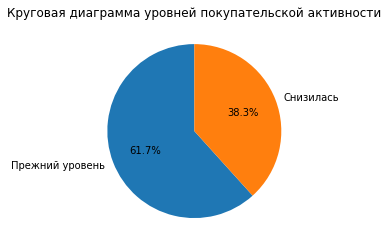

In [30]:
plt.pie(pokup['Количество'], labels=pokup['Покупательская активность'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма уровней покупательской активности')
plt.show()

**Покупательская активность - целевой признак. Наблюдается небольшой дисбаланс классов. Поскольку для нас важно предсказывать минорный класс, при построении моделей в дальнейшем буду использовать оверсэмплинг.**

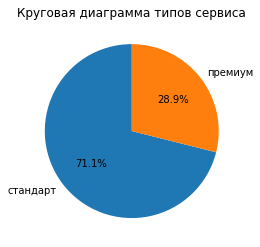

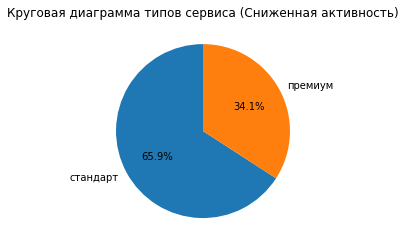

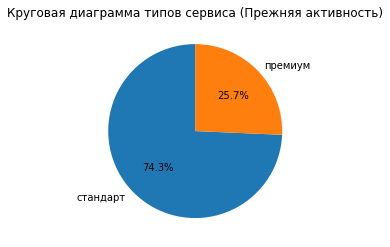

In [31]:
serv=market_file['Тип сервиса'].value_counts().reset_index()
serv.columns=['Тип сервиса', 'Количество']
serv_1 = market_file.query('`Покупательская активность`=="Снизилась"')['Тип сервиса'].value_counts().reset_index()
serv_1.columns=['Тип сервиса', 'Количество']
serv_2 = market_file.query('`Покупательская активность`!="Снизилась"')['Тип сервиса'].value_counts().reset_index()
serv_2.columns=['Тип сервиса', 'Количество']
plt.pie(serv['Количество'], labels=serv['Тип сервиса'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса')
plt.show()
plt.pie(serv_1['Количество'], labels=serv_1['Тип сервиса'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Сниженная активность)')
plt.show()
plt.pie(serv_2['Количество'], labels=serv_2['Тип сервиса'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Прежняя активность)')
plt.show()

**Клиентов, пользующихся премиальным сервисом почти в 3 раза меньше, чем клиентов, не пользующихся им. Среди клиентов со сниженной активностью доля премиум-клиентов выше, чем среди лояльных клиентов.**

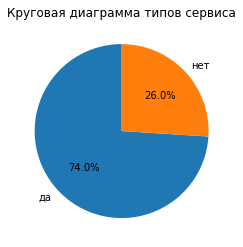

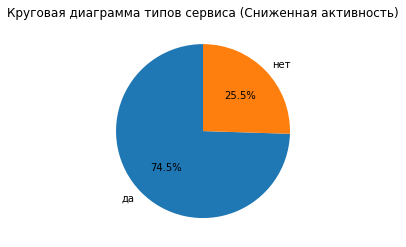

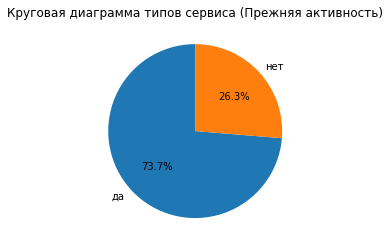

In [32]:
razr=market_file['Разрешить сообщать'].value_counts().reset_index()
razr.columns=['Разрешить сообщать', 'Количество']
razr_1 = market_file.query('`Покупательская активность`=="Снизилась"')['Разрешить сообщать'].value_counts().reset_index()
razr_1.columns=['Разрешить сообщать', 'Количество']
razr_2 = market_file.query('`Покупательская активность`!="Снизилась"')['Разрешить сообщать'].value_counts().reset_index()
razr_2.columns=['Разрешить сообщать', 'Количество']
plt.pie(razr['Количество'], labels=razr['Разрешить сообщать'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса')
plt.show()
plt.pie(razr_1['Количество'], labels=razr_1['Разрешить сообщать'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Сниженная активность)')
plt.show()
plt.pie(razr_2['Количество'], labels=razr_2['Разрешить сообщать'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Прежняя активность)')
plt.show()

**Клиентов, разрешивших присылать им сообщения почти в 3 раза больше, чем клиентов, запретивших это. Разницы между лояльными и уходящими клиентами практиччески нет.**

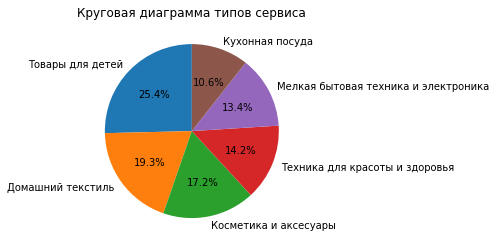

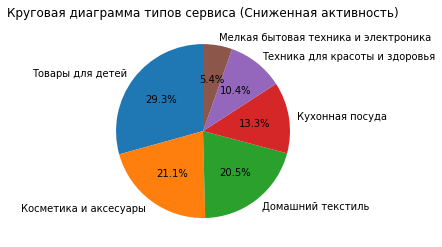

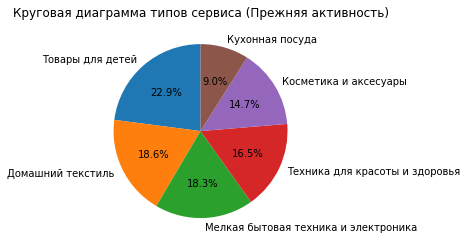

In [33]:
pop_kat=market_file['Популярная_категория'].value_counts().reset_index()
pop_kat.columns=['Популярная_категория', 'Количество']
pop_kat_1 = market_file.query('`Покупательская активность`=="Снизилась"')['Популярная_категория'].value_counts().reset_index()
pop_kat_1.columns=['Популярная_категория', 'Количество']
pop_kat_2 = market_file.query('`Покупательская активность`!="Снизилась"')['Популярная_категория'].value_counts().reset_index()
pop_kat_2.columns=['Популярная_категория', 'Количество']
plt.pie(pop_kat['Количество'], labels=pop_kat['Популярная_категория'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса')
plt.show()
plt.pie(pop_kat_1['Количество'], labels=pop_kat_1['Популярная_категория'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Сниженная активность)')
plt.show()
plt.pie(pop_kat_2['Количество'], labels=pop_kat_2['Популярная_категория'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса (Прежняя активность)')
plt.show()

**Количества популярных категорий пользователей не сильно далеки друг от друга. Различие между первым и последним в топе - примерно в 2.5 раза. Оба типа клиентов часто покупают товары для детей. Клиенты со сниженной активностью чаще покупали косметику и аксессуары и кухонную посуду, чем лояльные. Лояльные чаще покупали технику разных типов.**

**Для построения гистограмм и ящиков с усами напишу две функции, поскольку применять их нужно будет много раз.**

In [34]:
def hist_box(data, bins=10, title='', xlabel='', ylabel=''):
    '''Функция строит гистограмму с указанным количеством корзин, заголовком и подписями осей, а также 'ящики с усами' 
    по заданному столбцу из датасета'''
    plt.hist(data, bins=bins, color='darkblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    data_1=data.reset_index(drop=True)
    sns.boxplot(data=data_1)
    plt.title(title+' boxplot')
    plt.show()

In [35]:
def hist_box_2(data=market_file, column='Маркет_актив_6_мес', b1=10, b2=10, b3=10, title='', xlabel='', ylabel=''):
    '''Функция строит гистограммы по срезам с указанным количеством корзин, заголовком и подписями осей, а также 'ящики с усами' 
    по заданному столбцу из датасета'''
    plt.hist(data[column], 
             bins=b1, color='darkblue', alpha=0.4)
    plt.hist(data.query('`Покупательская активность`=="Снизилась"')[column],
             bins=b2, color='orange', alpha=0.4)
    plt.hist(data.query('`Покупательская активность`!="Снизилась"')[column], 
             bins=b3, color='green', alpha=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['Все', 'Сниженная активность', 'Прежняя активность'])
    plt.show()
    data_1=data[column].reset_index(drop=True)
    data_2=data.query('`Покупательская активность`=="Снизилась"')[column].reset_index(drop=True)
    data_3=data.query('`Покупательская активность`!="Снизилась"')[column].reset_index(drop=True)
    sns.boxplot(data=data_1)
    plt.title(title+' boxplot')
    plt.show()
    sns.boxplot(data=data_2)
    plt.title(title+' boxplot \n Сниженная активность')
    plt.show()
    sns.boxplot(data=data_3)
    plt.title(title+' boxplot \n Прежняя активность')
    plt.show()

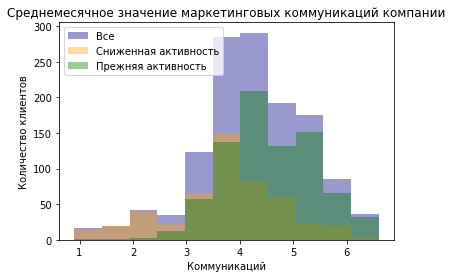

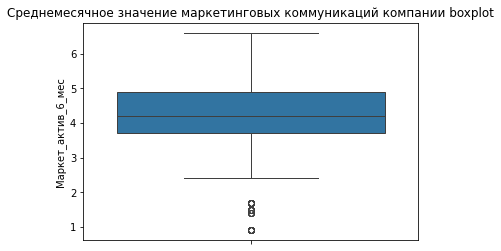

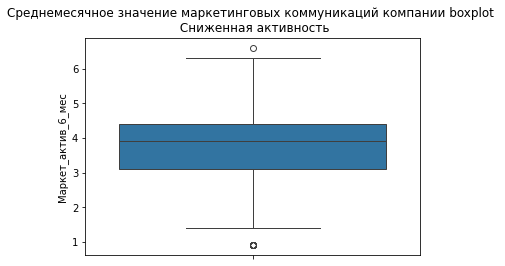

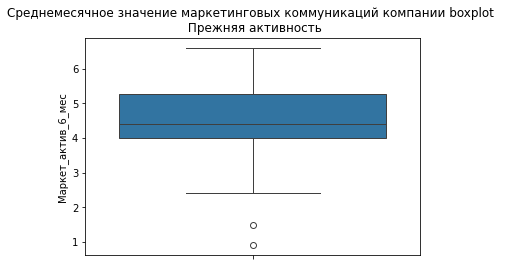

In [36]:
hist_box_2(market_file, column='Маркет_актив_6_мес', b1=11, b2=11, b3=11,
         title='Среднемесячное значение маркетинговых коммуникаций компании', xlabel='Коммуникаций', ylabel='Количество клиентов')

**От 1 до 6 коммуникаций, в основном 3-5. Сильных выбросов нет. Видно, что у уходящих клиентов в среднем было меньше коммуникаций с компанией.**

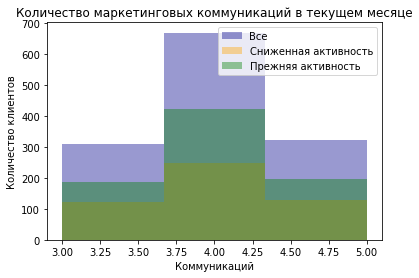

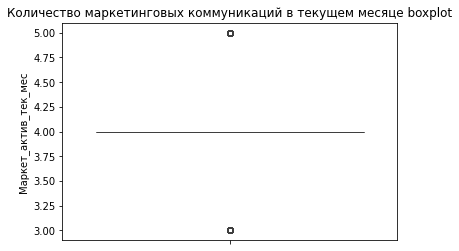

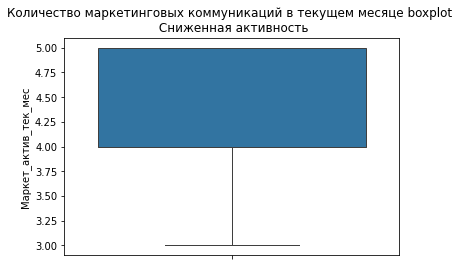

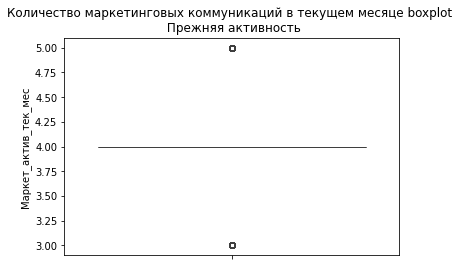

In [37]:
hist_box_2(market_file, 'Маркет_актив_тек_мес', b1=3,b2=3,b3=3, title='Количество маркетинговых коммуникаций в текущем месяце',
         xlabel='Коммуникаций', ylabel='Количество клиентов')

**Здесь три уникальных значения (3,4,5). Выбросов нет. Распределения для всех типов клиентов примерно одинаковые.**

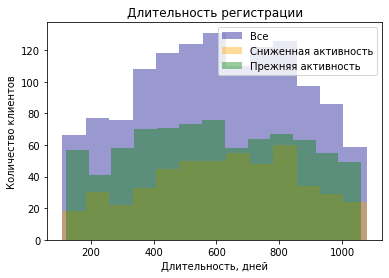

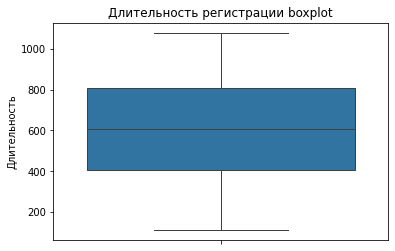

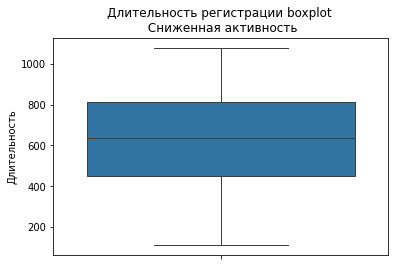

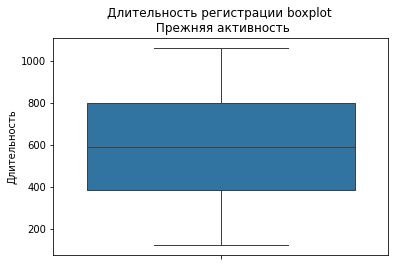

In [38]:
hist_box_2(market_file, 'Длительность', b1=13, b2=13, b3=13, title='Длительность регистрации',
         xlabel='Длительность, дней', ylabel='Количество клиентов')

**Выбросов нет. Распределения для всех типов клиентов примерно одинаковые.**

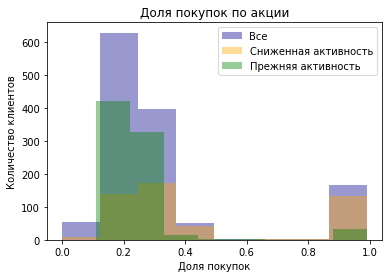

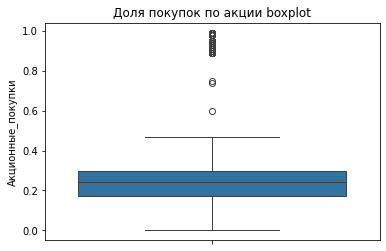

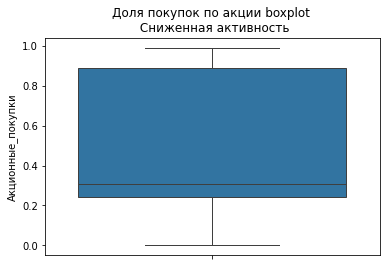

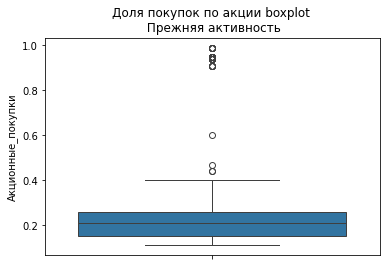

In [39]:
hist_box_2(market_file, 'Акционные_покупки', b1=8, b2=8, b3=8, title='Доля покупок по акции',
         xlabel='Доля покупок', ylabel='Количество клиентов')

**Для большинства клиентов акционные товары составляют 10-30% от общего числа покупок. Но также есть много клиентов, которые покупают в основном акционные товары. Бимодальное распределение. Клиенты со сниженной активностью чаще покупали акционные товары.**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Ага. Интересно. Тоже нужно в контексте таргета посмотреть на распределение</div> 
 


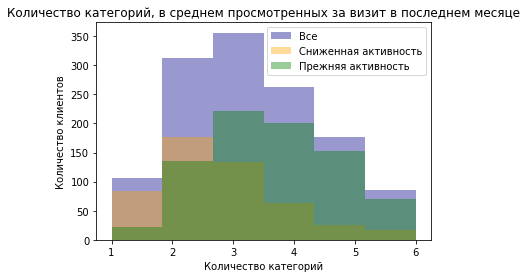

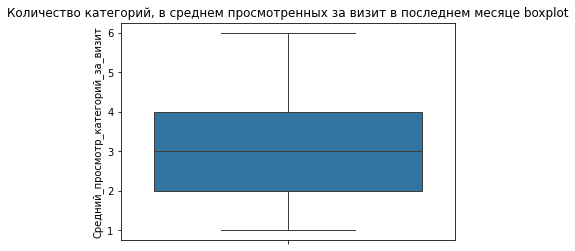

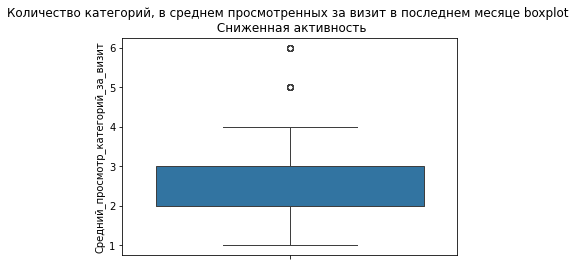

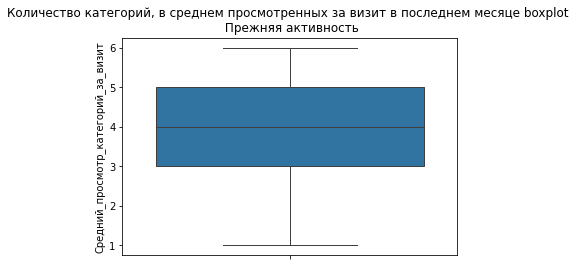

In [40]:
hist_box_2(market_file, 'Средний_просмотр_категорий_за_визит', b1=6, b2=6, b3=6,
         title='Количество категорий, в среднем просмотренных за визит в последнем месяце',
         xlabel='Количество категорий', ylabel='Количество клиентов')

**Выбросов нет. Клиенты со сниженной активностью в среднем просматривают намного меньше категорий.**

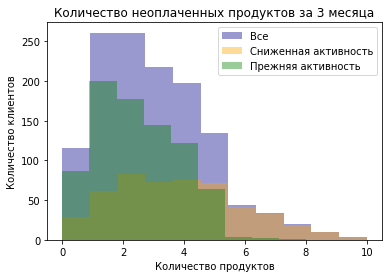

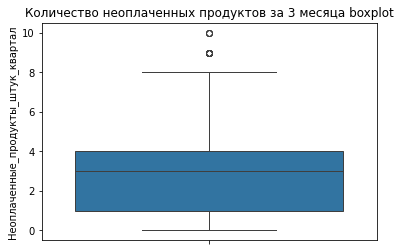

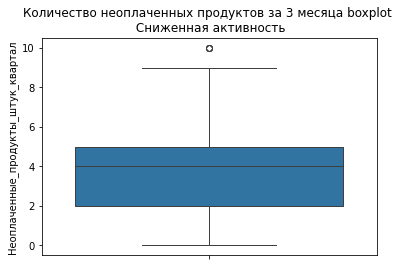

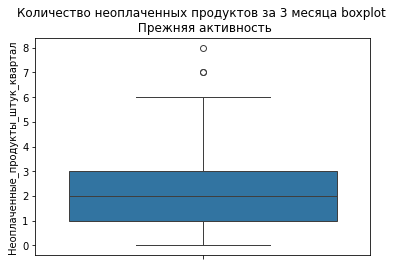

In [41]:
hist_box_2(market_file, 'Неоплаченные_продукты_штук_квартал', b1=11, b2=11, b3=9,
         title='Количество неоплаченных продуктов за 3 месяца', 
         xlabel='Количество продуктов', ylabel='Количество клиентов')

**Сильных выбросов нет. У уходящих клиентов распределение более широкое, у многих более 5 неоплаченных товаров.**

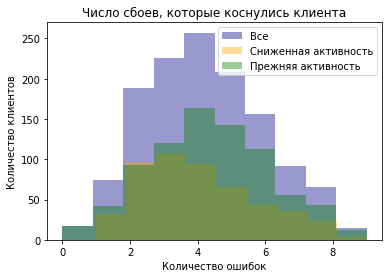

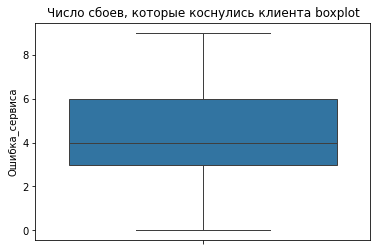

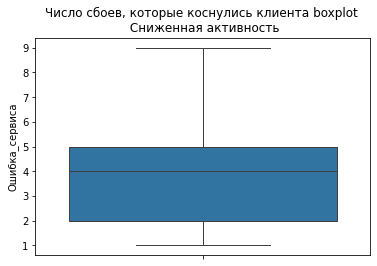

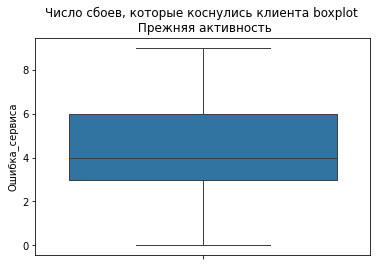

In [42]:
hist_box_2(market_file,'Ошибка_сервиса', b1=10, b2=9, b3=10, title='Число сбоев, которые коснулись клиента',
         xlabel='Количество ошибок', ylabel='Количество клиентов')

**Распределение близко к нормальному. Выбросов нет. У клиентов со сниженной активностью в среднем меньше сбоев, вероятно, это связано с тем, что они меньше времени проводят на сайте.**

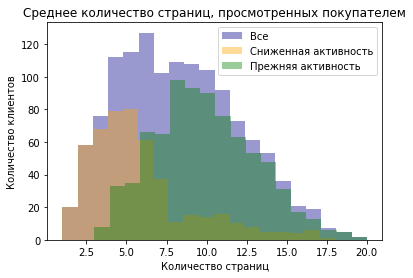

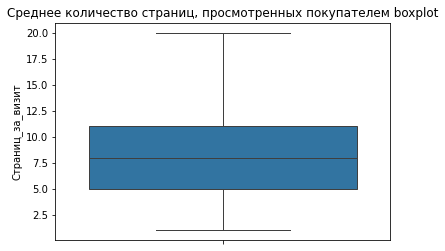

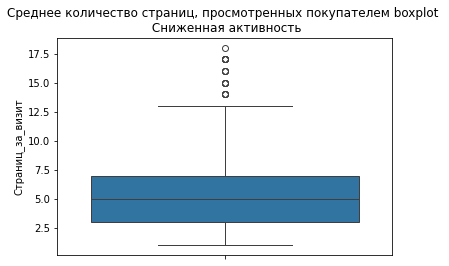

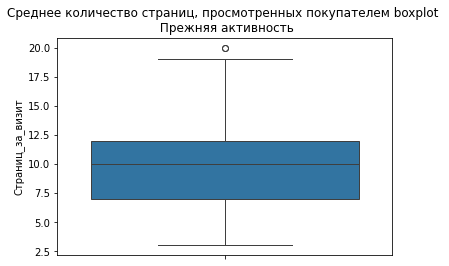

In [43]:
hist_box_2(market_file, 'Страниц_за_визит', b1=20, b2=18, b3=18, title='Среднее количество страниц, просмотренных покупателем',
         xlabel='Количество страниц', ylabel='Количество клиентов')

**Выбросов нет. Уходящие клиенты в среднем просматривали намного меньше страниц на сайте.**

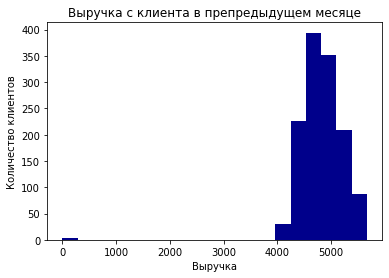

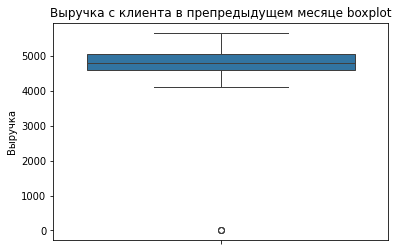

In [44]:
hist_box(market_money['Выручка'][market_money['Период']=='препредыдущий_месяц'],
         bins=20, title='Выручка с клиента в препредыдущем месяце', xlabel='Выручка', ylabel='Количество клиентов')

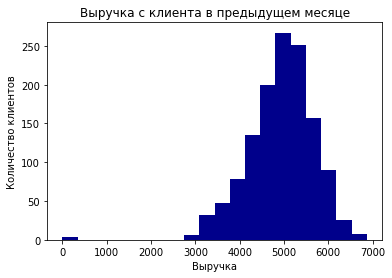

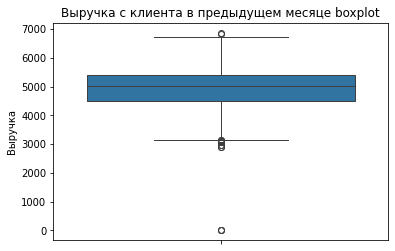

In [45]:
hist_box(market_money['Выручка'][market_money['Период']=='предыдущий_месяц'],
         bins=20, title='Выручка с клиента в предыдущем месяце', xlabel='Выручка', ylabel='Количество клиентов')

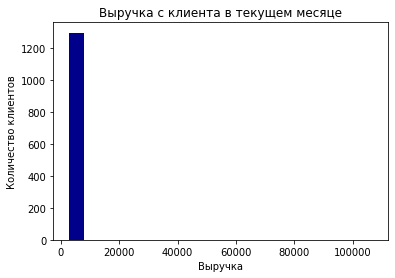

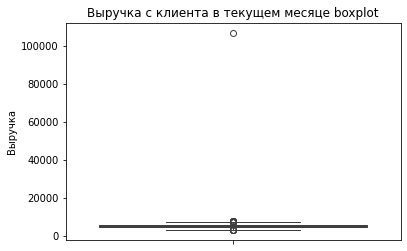

In [46]:
hist_box(market_money['Выручка'][market_money['Период']=='текущий_месяц'],
         bins=20, title='Выручка с клиента в текущем месяце', xlabel='Выручка', ylabel='Количество клиентов')

**В этих данных наблюдаются значительные выбросы. Исследую их.**

In [47]:
market_money.query('Период=="препредыдущий_месяц" & Выручка<3000')[['id','Выручка']]

,id,Выручка
0,215348,0.0
28,215357,0.0
35,215359,0.0


In [48]:
market_money.query('Период=="предыдущий_месяц" & Выручка<2000')[['id','Выручка']]

,id,Выручка
2,215348,0.0
29,215357,0.0
34,215359,0.0


In [49]:
market_money.query('Период=="текущий_месяц" & Выручка>8000')[['id','Выручка']]

,id,Выручка
98,215380,106862.2


**Клиенты с id 215348, 215357, 215359 ничего не покупали в двух предыдущих месяцах. Клиент с id 215380 - аномалия в этих данных, слишком большая сумма выкупа. Проверю общую выручку с них за 3 месяца с помощью pivot_table.**

In [50]:
market_money_pivot=market_money.pivot_table(index='id', values='Выручка', aggfunc='sum').reset_index()

In [51]:
interest_id=[215348, 215357, 215359, 215380]
market_money_pivot.query('id in @interest_id')

,id,Выручка
0,215348,3293.1
9,215357,5986.3
11,215359,4735.0
32,215380,117990.2


**Видимо, первые трое - новые пользователи или раньше зарегистрировались, но не совершали покупок. Четвертый, возможно, делал закупку для какого-то большого события, например, в качестве призов в конкурсе или для благотворительности. В любом случае, данные об этих клиентах необходимо удалить, чтобы они не влияли негативно на модели.**

In [52]:
mm_new=market_money.query('id not in @interest_id')

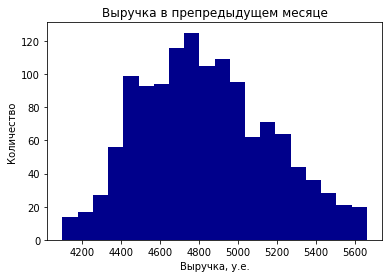

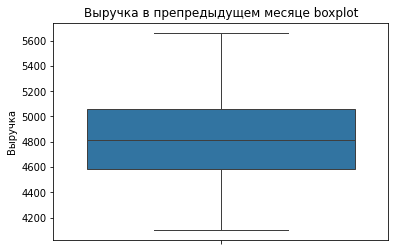

In [53]:
hist_box(mm_new['Выручка'][mm_new['Период']=='препредыдущий_месяц'],
         bins=20, title='Выручка в препредыдущем месяце', xlabel='Выручка, у.е.', ylabel='Количество')

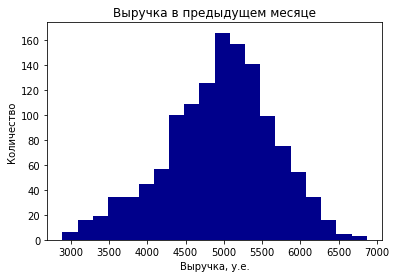

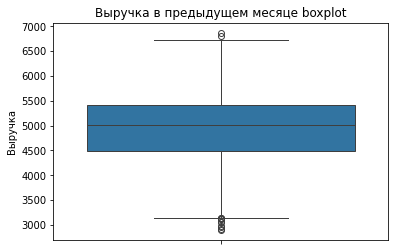

In [54]:
hist_box(mm_new['Выручка'][mm_new['Период']=='предыдущий_месяц'],
         bins=20, title='Выручка в предыдущем месяце', xlabel='Выручка, у.е.', ylabel='Количество')

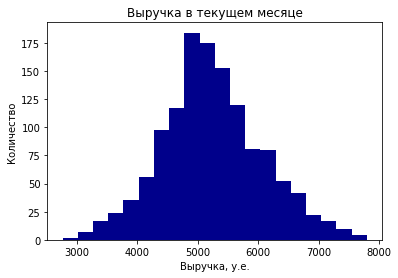

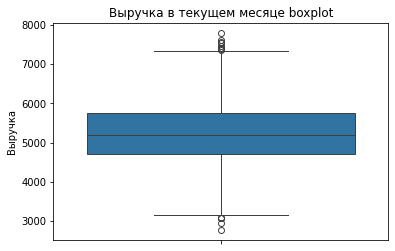

In [55]:
hist_box(mm_new['Выручка'][mm_new['Период']=='текущий_месяц'],
         bins=20, title='Выручка в текущем месяце', xlabel='Выручка, у.е.', ylabel='Количество')

**Удаление прошло успешно, теперь значительных выбросов не наблюдается. Удалю данные об этих клиентах и из других датасетов.**

In [56]:
mf_new=market_file.query('id not in @interest_id')
time_new=market_time.query('id not in @interest_id')
money_new=money.query('id not in @interest_id')

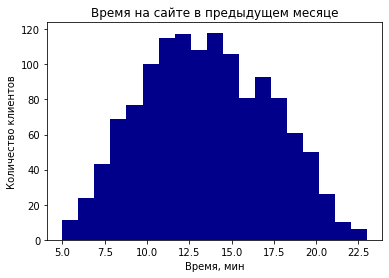

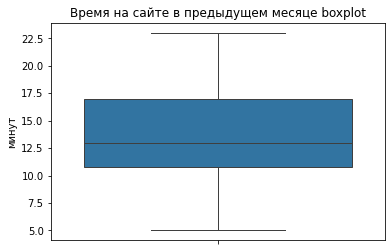

In [57]:
hist_box(time_new['минут'][time_new['Период']=='предыдущий_месяц'],
         bins=19, title='Время на сайте в предыдущем месяце', xlabel='Время, мин', ylabel='Количество клиентов')

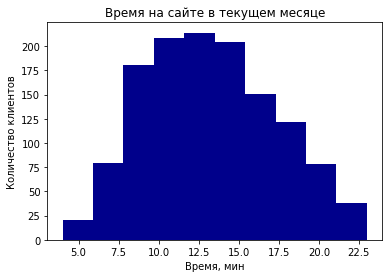

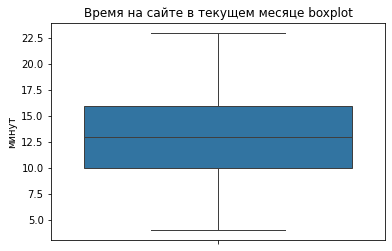

In [58]:
hist_box(time_new['минут'][time_new['Период']=='текущий_месяц'],
         bins=10, title='Время на сайте в текущем месяце', xlabel='Время, мин', ylabel='Количество клиентов')

**Выбросов в данных нет.**

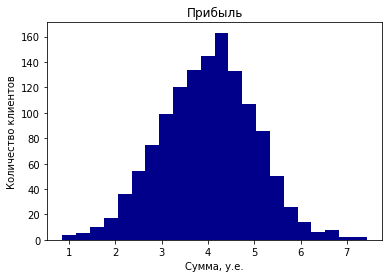

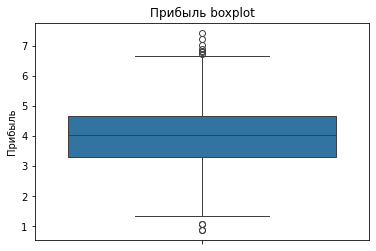

In [59]:
hist_box(money_new['Прибыль'], bins=22, title='Прибыль', xlabel='Сумма, у.е.', ylabel='Количество клиентов')

**Распределение близко к нормальному, сильных выбросов не наблюдается.**

**Проведен исследовательский анализ данных. Построены диаграммы для всех признаков. Необычности в распределениях нет. Немногочисленные выбросы и аномалии были устранены. Большая часть данных распределна куполообразно, со смещениями в ту или иную сторону.**

## Объединение таблиц <a class="anchor" id="chapter4"></a>

**Изучу общую информацию о таблицах после удаления выбросов.**

In [60]:
mf_new.info()
mm_new.info()
time_new.info()
money_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

**Удаление прошло успешно. Количество данных в таблицах пропорционально.**

**Сделаю сводные таблицы по выручке и минутам, проведенным на сайте по периодам.**

In [61]:
mm_period=mm_new.pivot_table(index='id', columns='Период', values='Выручка').reset_index()
#Изначально столбцы распределяются в алфавитном порядке; удаляю верхний этаж в подписи столбцов
mm_period.columns=['id', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц']
#Располагаю столбцы в хронологическом порядке
mm_period=mm_period.reindex(columns=['id', 'Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц',  'Выручка_текущий_месяц'])
mm_period.head()

,id,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц
0,215349,4472.0,5216.0,4971.6
1,215350,4826.0,5457.5,5058.4
2,215351,4793.0,6158.0,6610.4
3,215352,4594.0,5807.5,5872.5
4,215353,5124.0,4738.5,5388.5


**Делаю то же самое с минутами.**

In [62]:
time_period=time_new.pivot_table(index='id', columns='Период', values='минут').reset_index()
time_period.columns=['id', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц']
time_period=time_period.reindex(columns=['id',  'минуты_предыдущий_месяц',  'минуты_текущий_месяц'])
time_period.head()

,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [63]:
mm_period.info()
time_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1296 non-null   int64  
 1   Выручка_препредыдущий_месяц  1296 non-null   float64
 2   Выручка_предыдущий_месяц     1296 non-null   float64
 3   Выручка_текущий_месяц        1296 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       1296 non-null   int64
 1   минуты_предыдущий_месяц  1296 non-null   int64
 2   минуты_текущий_месяц     1296 non-null   int64
dtypes: int64(3)
memory usage: 30.5 KB


**Теперь во всех таблицах одинаковое число строк с одними и теми же id, можно их объединять.**

**Также сделаю столбец с id столбцом индексов, чтобы он не влиял на моделирование.**

In [64]:
table = pd.merge(mf_new, pd.merge(mm_period, time_period, on='id', how='outer'), on='id', how='outer').set_index('id')
table.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [65]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1296 non-null   object 
 1   Тип сервиса                          1296 non-null   object 
 2   Разрешить сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

**Объединение прошло успешно.**

## Корреляционный анализ <a class="anchor" id="chapter5"></a>

**Построю матрицу корреляции с помощью Phik.**

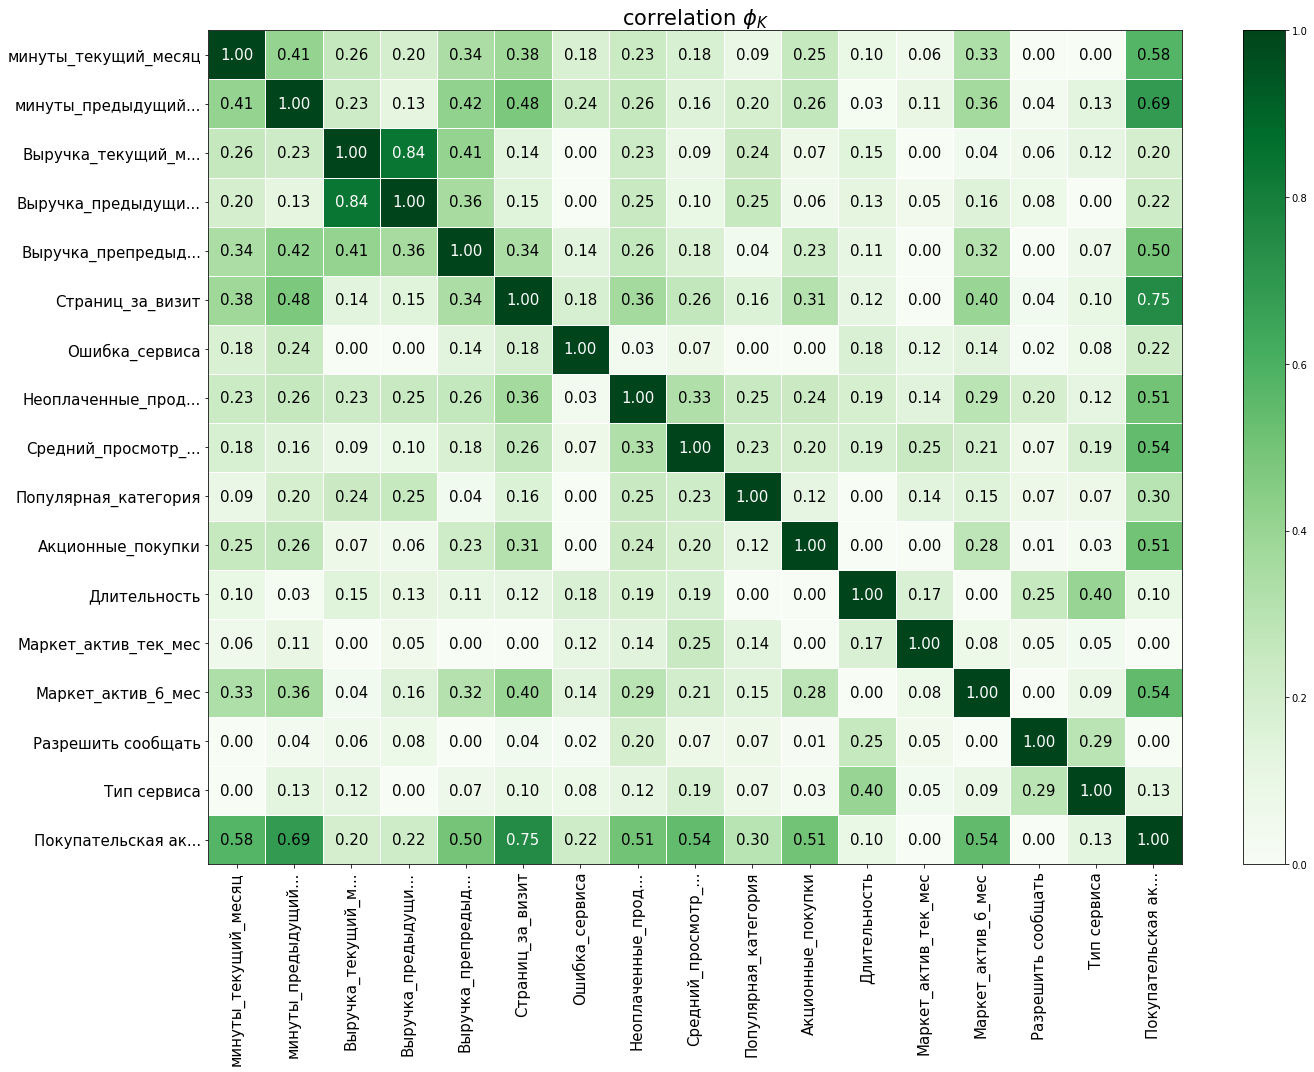

In [66]:
# создаём список с наименованиями количественных признаков
interval_cols = ['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'Выручка_препредыдущий_месяц',
 'Выручка_предыдущий_месяц',
 'Выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(table, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

**Высокая корреляция наблюдается для выручки в текщем и выручки в предыдущем месяцах, хотя связь между ними неочевидна. Построю диаграмму рассеяния для этих признаков.**

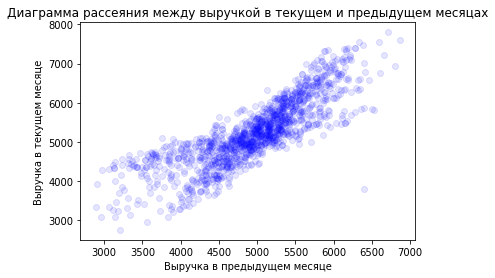

In [67]:
plt.scatter(table.Выручка_предыдущий_месяц, table.Выручка_текущий_месяц, color='blue', alpha=0.1)
plt.title('Диаграмма рассеяния между выручкой в текущем и предыдущем месяцах')
plt.xlabel('Выручка в предыдущем месяце')
plt.ylabel('Выручка в текущем месяце')
plt.show()

**Действительно, прослеживается зависимость близкая к линейной. Пока что не буду устранять эту мультиколлинеарность. Посмотрю в дальнейшем, насколько эти данные будут влиять на результат. Для логистической ререссии буду использовать l1-регуляризацию, которая хорошо справляется с мультиколлинеарностью.**

**Остальные признаки между собой не коррелируют. Наблюдается высокая корреляция страниц за визит с целевым признаком, но недостаточная для того, чтобы считать это утечкой данных.**

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен, здесь ничего не удаляем, все важно.
</div>  


## Использование пайплайнов <a class="anchor" id="chapter6"></a>

**Получу список столбцов, чтобы было удобно копировать для создания списков категориальных и количественных признаков.**

In [68]:
table.columns.to_list()

['Покупательская активность',
 'Тип сервиса',
 'Разрешить сообщать',
 'Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Популярная_категория',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'Выручка_препредыдущий_месяц',
 'Выручка_предыдущий_месяц',
 'Выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

In [69]:
#Зафиксирую константы
RANDOM_STATE = 42
TEST_SIZE = 0.25
#Разбиваю признаки на нецелевые и целевой
X = table.drop(['Покупательская активность'], axis=1)
y = table['Покупательская активность']


#Разбиваю датасет на тренировочную и тестовую выборки с использованием стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y) 



#Создаю списки с названиями категориальных и количественных признаков
ohe_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

num_columns = ['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'Выручка_препредыдущий_месяц',
 'Выручка_предыдущий_месяц',
 'Выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

#Для кодирования целевого признака использую LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test) 

#Cоздаю общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

#Создаю итоговый пайплайн, содержащий подготовку данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

#В param_grid переберу 4 модели и признаки для них
#Для кодирования буду использовать везде OneHotEncoder, для масштабирования - 3 разных скейлера и вариант без масштабирования
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,4),
        'models__max_features': range(2,4),
        'preprocessor__ohe': [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,10),
        'preprocessor__ohe': [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,3),
        'preprocessor__ohe': [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(1,3),
        'preprocessor__ohe': [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']         
    
    }
    
]

#Параметров не слишком много, поэтому буду использовать поиск по сетке
#В качестве метрики выберу ROC-AUC, потому что она уделяет сильное внимание ошибкам и не зависит от порога классификации
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', grid.best_score_)



Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('num', RobustScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные

**В результате лучшей моделью оказалась SVC с параметром С=1. Метрика хорошая на тренировочной и тестовой выборках, сильного переобучения не наблюдается. Лучшее масштабирование произошло с помощью RobustScaler.**

**Я также пробовал перебирать другие ядра для модели SVC и степень для ядра poly. Но в таком случае поиск занял значительно больше времени и модель переобучилась. Поэтому я решил оставить ядро rbf по умолчанию.**

## Анализ важности признаков <a class="anchor" id="chapter4"></a>

**Проведу обучение модели SVC c параметром С=1 без использования пайплайна. Подготовку данных осуществлю с помощью OneHotEncoder и RobustScaler.**

Площадь ROC-кривой: 0.9139263034421388


C:\Users\User\practicum\practicum_env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

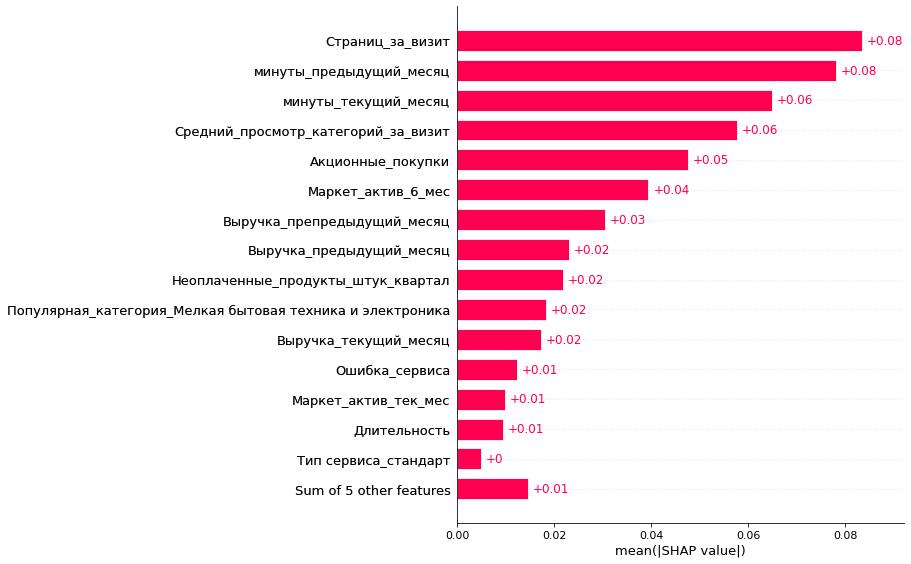

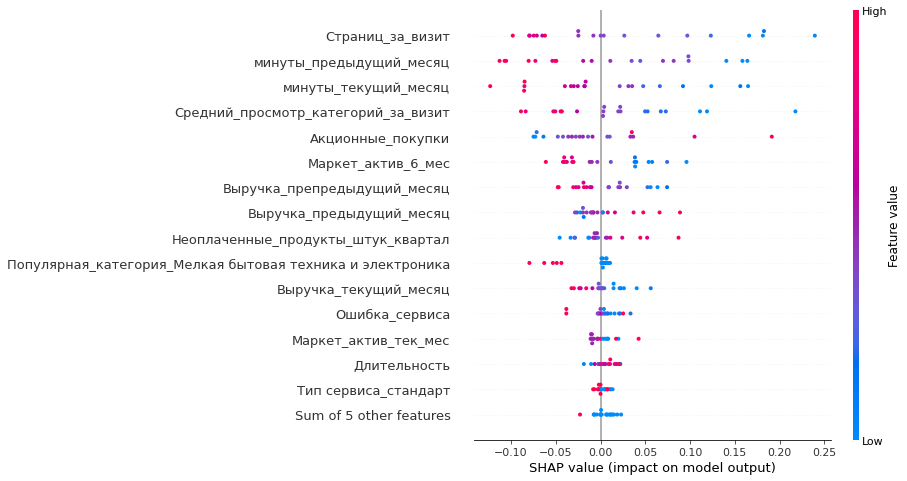

In [70]:
#Делаю те же действия для подготовки данных
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = table.drop(['Покупательская активность'], axis=1)
y = table['Покупательская активность']


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_le = label_encoder.transform(y_train)
y_test_le = label_encoder.transform(y_test) 

ohe=OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[ohe_columns])

#Cохраняю в переменной encoder_col_names список названий новых столбцов
encoder_col_names = ohe.get_feature_names_out()

#Преобразовываем категориальные переменные в тренировочной и тестовой выборках
X_train_ohe = ohe.transform(X_train[ohe_columns])
X_test_ohe = ohe.transform(X_test[ohe_columns])

#Обучаю StandardScaler
scaler=RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])

#Выполняю преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

#Объединяю все преобразованные данные в тренировочный и тестовый датафреймы
X_train_prep = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_prep = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#Обучаю лучшую модель
model=SVC(C=1, random_state=RANDOM_STATE, probability=True)
model.fit(X_train_prep.values, y_train_le)
# Проверяю работу модели на тестовой выборке
# Рассчитываю прогноз на тестовых данных
probabilities = model.predict_proba(X_test_prep) 
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test_le, probabilities_one))

#Возьму небольшие выборки, поскольку SHAP работает очень долго (для таких выборок обработка у меня происходит примерно за 3 минуты)
X_sample_test = shap.sample(X_test_prep,20)
X_sample_train = shap.sample(X_train_prep,60)
explainer = shap.KernelExplainer(lambda x: model.predict_proba(x), X_sample_train)
shap_values = explainer(X_sample_test)

shap.plots.bar(shap_values[:,:,1], max_display=16)
plt.show()
shap.plots.beeswarm(shap_values[:,:,1], max_display=16)
plt.show()


**На столбчатой диаграмме можно видеть, что наибольший вклад в решение модели вносят такие признаки, как количество страниц, посещенных клиентом за визит, и время проведенное на сайте за текущий и предыдущий месяцы. Причем на диаграмме Шепли мы видим, что чем меньше эти значения, тем сильнее склоняется уровень покупательской активности к снижению. Доля акционных покупок влияет противоположным образом. Это можно объяснить тем, что, вероятно, люди, часто покупающие товары по акции не могут себе позволить часто закупаться в силу их финансового положения, что склоняет их к снижению активности.**

**Выручка за текущий и предыдущий месяцы не так сильно влиет на предсказания модели, поэтому их высокая корреляция не сильно повлияла на качество модели.**

## Сегментация покупателей <a class="anchor" id="chapter8"></a>

**Получу вероятности отнесения к классам.**

In [71]:
y_pred=model.predict_proba(X_test_prep)
pd.DataFrame(y_pred).head(10)

C:\Users\User\practicum\practicum_env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,0,1
0,0.947361,0.052639
1,0.044187,0.955813
2,0.864058,0.135942
3,0.017108,0.982892
4,0.538417,0.461583
5,0.923675,0.076325
6,0.978211,0.021789
7,0.967555,0.032445
8,0.930438,0.069562
9,0.934961,0.065039


**Чтобы уточнить, какой из этих столбцов относится к снижению активности, посмотрю на тестовую таблицу до кодирования.**

In [72]:
pd.DataFrame(y_test).head(10)

,Покупательская активность
id,
216161,Прежний уровень
215654,Снизилась
216307,Прежний уровень
215501,Снизилась
215934,Снизилась
216576,Прежний уровень
216465,Прежний уровень
216527,Прежний уровень
215885,Прежний уровень


**Соотнеся эти две таблицы, становится понятно, что вероятность снижения активности находится в столбце 1.**

**После оверсэмплинга индексы сбросились и перемешались, поэтому сброшу индекцы в таблице X_test. Сегментирование буду проводить только по тестовой таблице, поскольку для нее есть предсказанные вероятности снижения активности.**

In [73]:
X_test_reset=X_test.reset_index()
X_test_reset.head()

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
0,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,4912.0,3973.0,3289.2,16,17
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9
2,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,4565.0,5444.0,6335.8,20,11
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9
4,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,4451.0,5090.0,5773.8,15,18


**Добавлю к этой таблице вероятности, предварительно округлив их до 3 знаков после точки.**

In [74]:
def round_(x:float):
    '''Функция для округления'''
    return round(x,3)

In [75]:
X_test_reset['Вероятность снижения активности']=pd.DataFrame(y_pred)[1].apply(round_)
X_test_reset.head()

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Вероятность снижения активности
0,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,4912.0,3973.0,3289.2,16,17,0.053
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.956
2,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,4565.0,5444.0,6335.8,20,11,0.136
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.983
4,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,4451.0,5090.0,5773.8,15,18,0.462


In [76]:
X_test_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   324 non-null    int64  
 1   Тип сервиса                          324 non-null    object 
 2   Разрешить сообщать                   324 non-null    object 
 3   Маркет_актив_6_мес                   324 non-null    float64
 4   Маркет_актив_тек_мес                 324 non-null    int64  
 5   Длительность                         324 non-null    int64  
 6   Акционные_покупки                    324 non-null    float64
 7   Популярная_категория                 324 non-null    object 
 8   Средний_просмотр_категорий_за_визит  324 non-null    int64  
 9   Неоплаченные_продукты_штук_квартал   324 non-null    int64  
 10  Ошибка_сервиса                       324 non-null    int64  
 11  Страниц_за_визит                

**Добавление столбца прошло успешно.**

**Теперь можно спокойно объединить эти данные с данными о прибыли клиентов по столбцу id.**

In [77]:
result_table=pd.merge(X_test_reset, money_new, on='id', how='left')
result_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   324 non-null    int64  
 1   Тип сервиса                          324 non-null    object 
 2   Разрешить сообщать                   324 non-null    object 
 3   Маркет_актив_6_мес                   324 non-null    float64
 4   Маркет_актив_тек_мес                 324 non-null    int64  
 5   Длительность                         324 non-null    int64  
 6   Акционные_покупки                    324 non-null    float64
 7   Популярная_категория                 324 non-null    object 
 8   Средний_просмотр_категорий_за_визит  324 non-null    int64  
 9   Неоплаченные_продукты_штук_квартал   324 non-null    int64  
 10  Ошибка_сервиса                       324 non-null    int64  
 11  Страниц_за_визит                

**Объединение прошло успешно.**

**Построю гистограммы по новой таблице, чтобы можно было понимать в каких дипазонах изменяются признаки, чтобы лучше сегментировать клиентов.**

[**Сделаю здесь ссылку на исследовательский анализ, чтобы можно было сравнивать распределения.**](#chapter3)

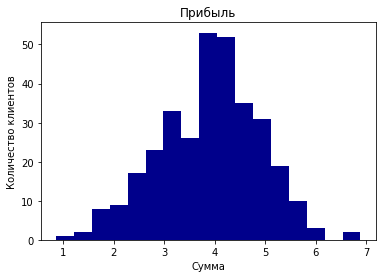

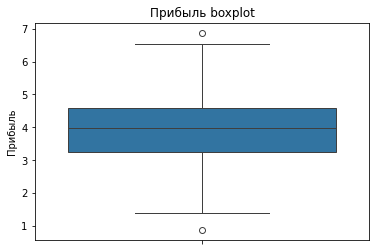

In [78]:
hist_box(result_table['Прибыль'], bins=17, title='Прибыль', xlabel='Сумма', ylabel='Количество клиентов')

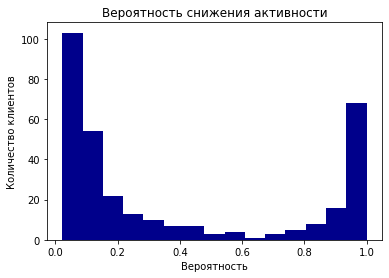

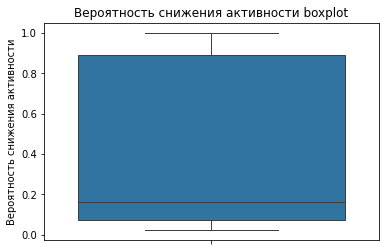

In [79]:
hist_box(result_table['Вероятность снижения активности'], bins=15, title='Вероятность снижения активности',
         xlabel='Вероятность', ylabel='Количество клиентов')

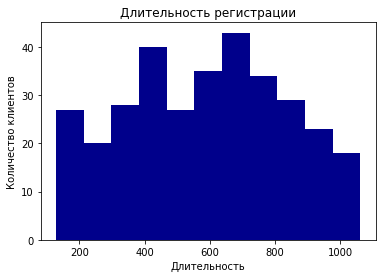

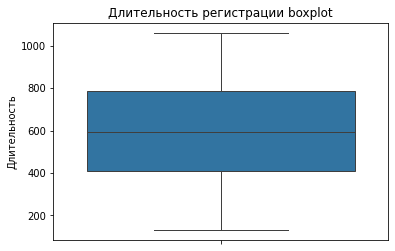

In [80]:
hist_box(result_table['Длительность'], bins=11, title='Длительность регистрации',
         xlabel='Длительность', ylabel='Количество клиентов')

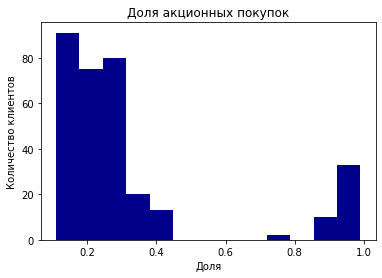

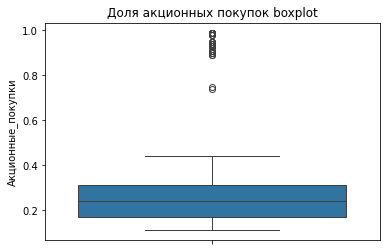

In [81]:
hist_box(result_table['Акционные_покупки'], bins=13, title='Доля акционных покупок',
         xlabel='Доля', ylabel='Количество клиентов')

**Основные распределения не сильно отличаются от генеральной выборки.**

**Я бы хотел рассмотреть два сегмента.** 
- **Первый сегмент - клиенты, пользующиеся премиум сервисом, с высокой вероятностью снижения активности.**
- **Второй сегмент - клиенты с высокой прибылью и высокой вероятностью снижения активности.**

In [82]:
segment_1=result_table.query("(`Вероятность снижения активности`>0.6) & (`Тип сервиса`=='премиум')")
segment_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 319
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   42 non-null     int64  
 1   Тип сервиса                          42 non-null     object 
 2   Разрешить сообщать                   42 non-null     object 
 3   Маркет_актив_6_мес                   42 non-null     float64
 4   Маркет_актив_тек_мес                 42 non-null     int64  
 5   Длительность                         42 non-null     int64  
 6   Акционные_покупки                    42 non-null     float64
 7   Популярная_категория                 42 non-null     object 
 8   Средний_просмотр_категорий_за_визит  42 non-null     int64  
 9   Неоплаченные_продукты_штук_квартал   42 non-null     int64  
 10  Ошибка_сервиса                       42 non-null     int64  
 11  Страниц_за_визит                 

**В этом сегменте 42 клиента.**

In [83]:
segment_1.head(10)

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Вероятность снижения активности,Прибыль
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.956,2.75
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.983,3.74
10,215844,премиум,да,4.3,4,1041,0.99,Кухонная посуда,4,1,6,6,4880.0,5339.0,5866.8,9,14,0.844,2.79
12,215375,премиум,да,3.0,4,558,0.89,Товары для детей,3,3,7,4,4715.0,5253.5,5633.1,8,9,0.978,4.18
21,215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,4267.0,5059.0,5018.7,5,7,0.983,5.64
22,215671,премиум,да,4.0,4,820,0.22,Косметика и аксесуары,1,4,8,6,4670.0,5379.5,6034.7,7,8,0.924,3.73
28,215362,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4765.0,4314.0,4447.9,13,13,0.930,3.49
38,215496,премиум,да,4.0,4,684,0.40,Техника для красоты и здоровья,1,6,2,4,4896.0,5020.0,5237.1,11,11,0.991,4.64
44,216510,премиум,да,4.9,5,723,0.91,Мелкая бытовая техника и электроника,2,4,6,9,5290.0,5821.0,6411.2,20,12,0.886,3.76
51,215587,премиум,да,4.6,4,800,0.93,Домашний текстиль,4,2,5,4,4912.0,5551.0,5549.7,7,7,0.977,3.68


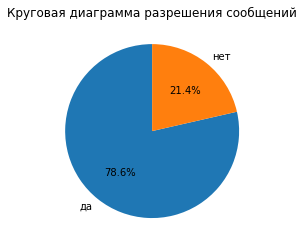

In [84]:
razr_2=segment_1['Разрешить сообщать'].value_counts().reset_index()
razr_2.columns=['Разрешить сообщать', 'Количество']
plt.pie(razr_2['Количество'], labels=razr_2['Разрешить сообщать'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма разрешения сообщений')
plt.show()

**Часть клиентов запретила присылать им сообщения.**

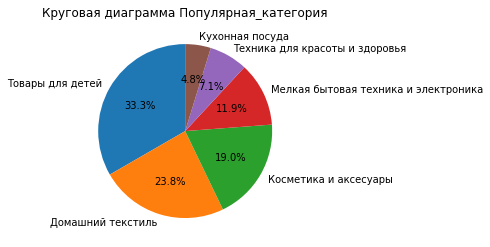

In [85]:
pop_2=segment_1['Популярная_категория'].value_counts().reset_index()
pop_2.columns=['Популярная_категория', 'Количество']
plt.pie(pop_2['Количество'], labels=pop_2['Популярная_категория'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма Популярная_категория')
plt.show()

**Большая часть этих клиентов покупают товары для детей, домашний текстиль, косметику и аксессуары.**

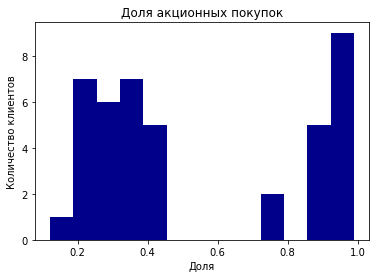

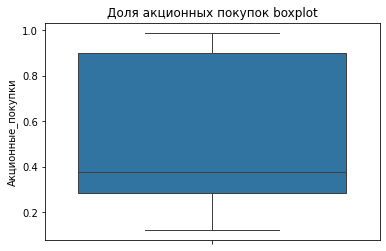

In [86]:
hist_box(segment_1['Акционные_покупки'], bins=13, title='Доля акционных покупок',
         xlabel='Доля', ylabel='Количество клиентов')

**Часть клиентов в основном покупает акционные товары. Распределение близко к распределению по генеральной выборке.**

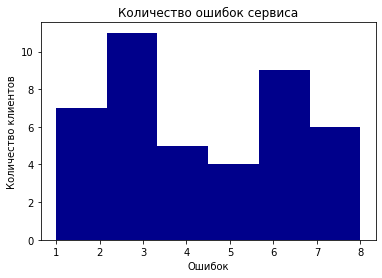

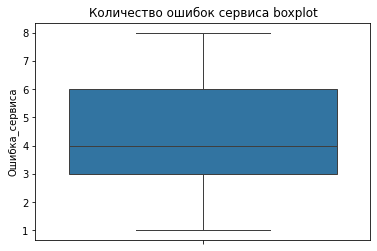

In [87]:
hist_box(segment_1['Ошибка_сервиса'], bins=6, title='Количество ошибок сервиса',
         xlabel='Ошибок', ylabel='Количество клиентов')

**Необычного распределения по ошибкам в сервисе нет. Наблюдаются две моды, но это случайность.**

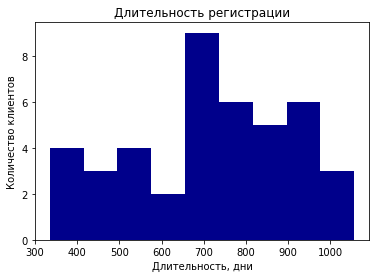

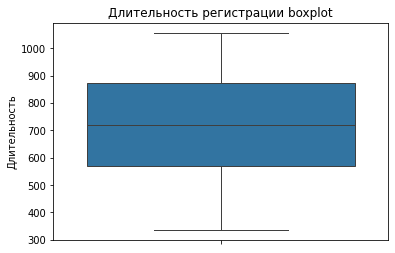

In [88]:
hist_box(segment_1['Длительность'], bins=9, title='Длительность регистрации',
         xlabel='Длительность, дни', ylabel='Количество клиентов')

**Большинство клиентов из этого сегммента зарегистрированы давно, тогда как в генеральной выборке распределение близко к равномерному.**

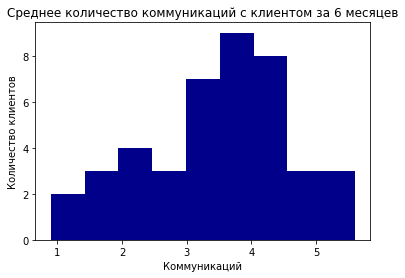

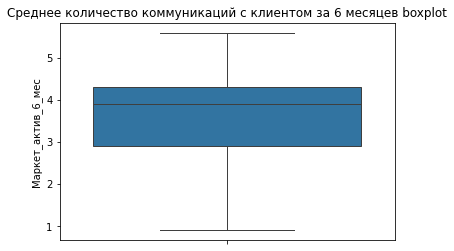

In [89]:
hist_box(segment_1['Маркет_актив_6_мес'], bins=9, title='Среднее количество коммуникаций с клиентом за 6 месяцев',
         xlabel='Коммуникаций', ylabel='Количество клиентов')

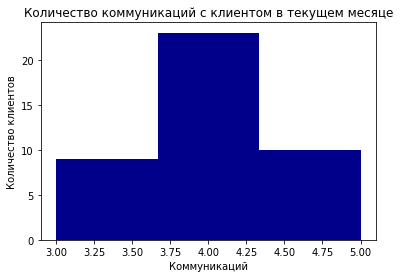

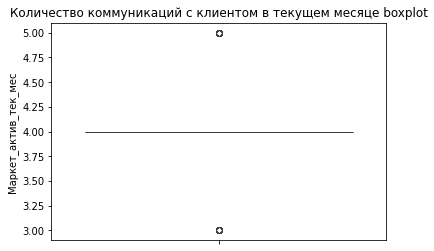

In [90]:
hist_box(segment_1['Маркет_актив_тек_мес'], bins=3, title='Количество коммуникаций с клиентом в текущем месяце',
         xlabel='Коммуникаций', ylabel='Количество клиентов')

**Распределения по коммуникациям близки к распределениям в генеральной выборке.**

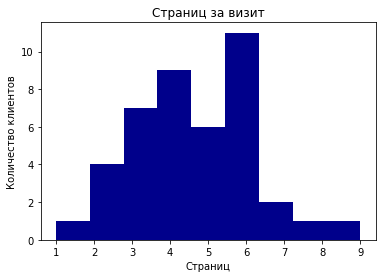

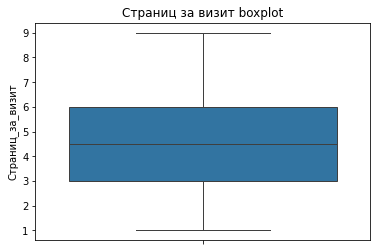

In [91]:
hist_box(segment_1['Страниц_за_визит'], bins=9, title='Страниц за визит',
         xlabel='Страниц', ylabel='Количество клиентов')

**Клиенты из этого сегмента в среднем смотрят меньше страниц, чем по генеральной выборке. Скорее всего они заходят за конкретными товарами.**

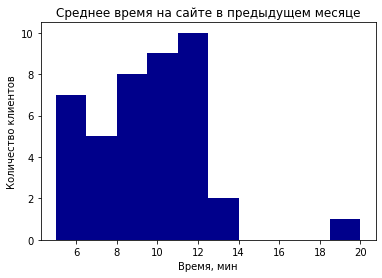

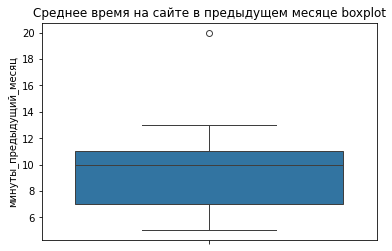

In [92]:
hist_box(segment_1['минуты_предыдущий_месяц'], bins=10, title='Среднее время на сайте в предыдущем месяце',
         xlabel='Время, мин', ylabel='Количество клиентов')

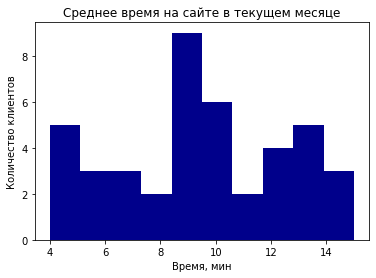

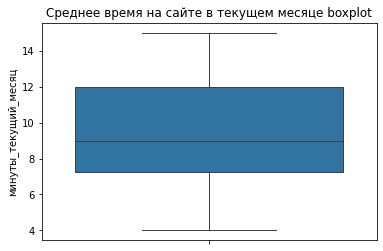

In [93]:
hist_box(segment_1['минуты_текущий_месяц'], bins=10, title='Среднее время на сайте в текущем месяце',
         xlabel='Время, мин', ylabel='Количество клиентов')

**В среднем такие клиенты проводят меньше времени на сайте по статистике за два месяца, чем по генеральной выборке.**

**Я бы порекомендовал магазину с целью сохранения активности клиентов из этого сегмента разместить завлекающую, но не навязчивую рекламу своих же товаров из наиболее популярных категорий конкретного клиента. Это поднимет интерес покупателей, они станут просматривать больше страниц, больше времени проводить на сайте, а также, вероятно, совершать больше покупок по рекламным объявлениям. Кроме того можно предлагать премиум-клиентам персональные скидки по наиболее часто приобретаемым товарам и категориям.**

---

**Перейду ко второму сегменту.**

In [94]:
segment_2=result_table.query("(`Вероятность снижения активности`>0.6) & (`Прибыль`> 4)")
segment_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 12 to 323
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   54 non-null     int64  
 1   Тип сервиса                          54 non-null     object 
 2   Разрешить сообщать                   54 non-null     object 
 3   Маркет_актив_6_мес                   54 non-null     float64
 4   Маркет_актив_тек_мес                 54 non-null     int64  
 5   Длительность                         54 non-null     int64  
 6   Акционные_покупки                    54 non-null     float64
 7   Популярная_категория                 54 non-null     object 
 8   Средний_просмотр_категорий_за_визит  54 non-null     int64  
 9   Неоплаченные_продукты_штук_квартал   54 non-null     int64  
 10  Ошибка_сервиса                       54 non-null     int64  
 11  Страниц_за_визит                

**Здесь 54 пользователя.**

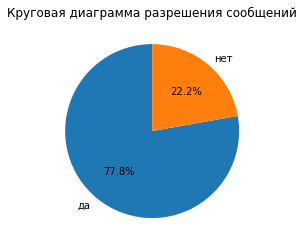

In [95]:
razr_3=segment_2['Разрешить сообщать'].value_counts().reset_index()
razr_3.columns=['Разрешить сообщать', 'Количество']
plt.pie(razr_3['Количество'], labels=razr_3['Разрешить сообщать'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма разрешения сообщений')
plt.show()

**Чуть менее четверти клиентов запретило присылать им сообщения.**

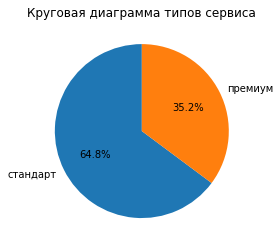

In [96]:
tip=segment_2['Тип сервиса'].value_counts().reset_index()
tip.columns=['Тип сервиса', 'Количество']
plt.pie(tip['Количество'], labels=tip['Тип сервиса'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма типов сервиса')
plt.show()

**Большая часть клиентов в этом сегменте - со стандартным типом обслуживания.**

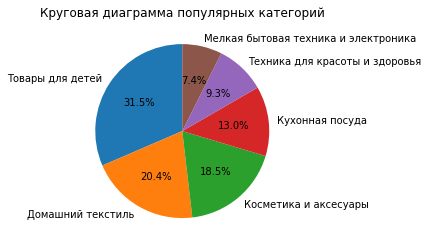

In [97]:
pop_3=segment_2['Популярная_категория'].value_counts().reset_index()
pop_3.columns=['Популярная_категория', 'Количество']
plt.pie(pop_3['Количество'], labels=pop_3['Популярная_категория'], autopct='%1.1f%%', startangle=90)
plt.title(label='Круговая диаграмма популярных категорий')
plt.show()

**Здесь также основные категории - товары для детей, домашний текстиль, косметика и аксессуары.**

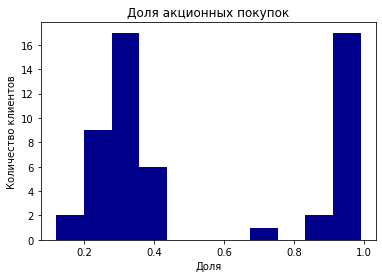

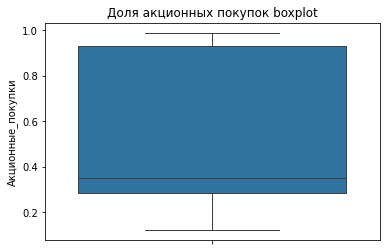

In [98]:
hist_box(segment_2['Акционные_покупки'], bins=11, title='Доля акционных покупок',
         xlabel='Доля', ylabel='Количество клиентов')

**В этом сегменте больше часть клиентов, приобретающих в основном акционные товары, чем в первом и по генеральной выборке.**

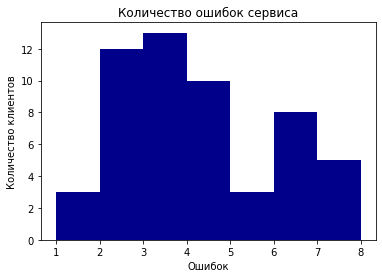

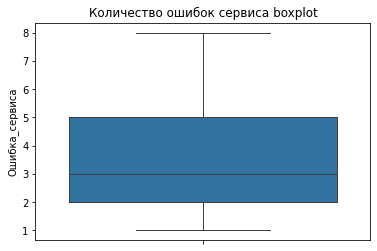

In [99]:
hist_box(segment_2['Ошибка_сервиса'], bins=7, title='Количество ошибок сервиса',
         xlabel='Ошибок', ylabel='Количество клиентов')

**В распределении ошибок ничего необычного.**

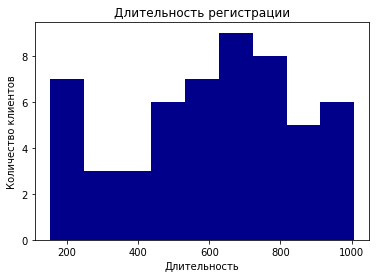

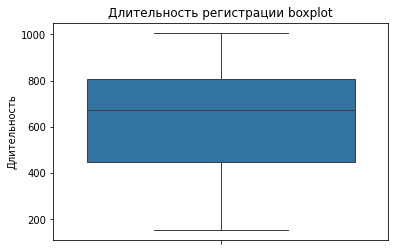

In [100]:
hist_box(segment_2['Длительность'], bins=9, title='Длительность регистрации',
         xlabel='Длительность', ylabel='Количество клиентов')

**Распределение близко к генеральной выборке.**

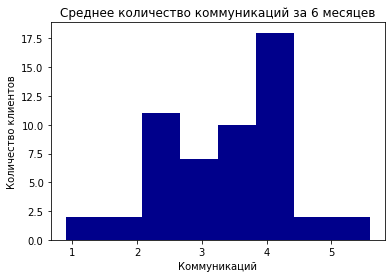

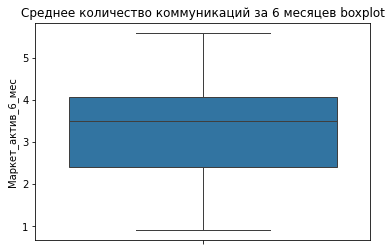

In [101]:
hist_box(segment_2['Маркет_актив_6_мес'], bins=8, title='Среднее количество коммуникаций за 6 месяцев',
         xlabel='Коммуникаций', ylabel='Количество клиентов')

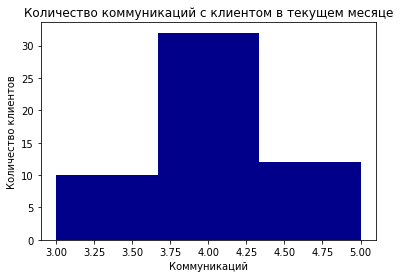

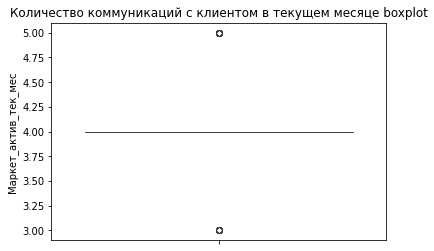

In [102]:
hist_box(segment_2['Маркет_актив_тек_мес'], bins=3, title='Количество коммуникаций с клиентом в текущем месяце',
         xlabel='Коммуникаций', ylabel='Количество клиентов')

**В распределениях по коммуникациям ничего необычного.**

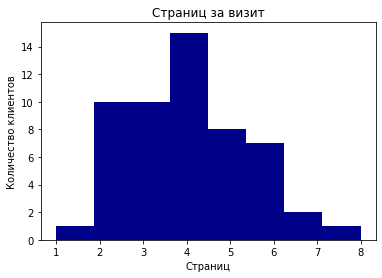

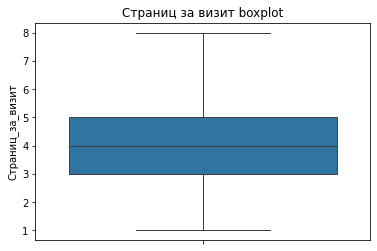

In [103]:
hist_box(segment_2['Страниц_за_визит'], bins=8, title='Страниц за визит',
         xlabel='Страниц', ylabel='Количество клиентов')

**Количество посещаемых страниц в среднем больше, чем в первом сегменте, но меньше, чем в генеральной выборке.**

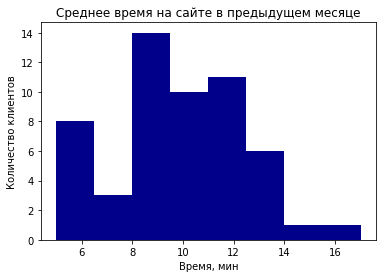

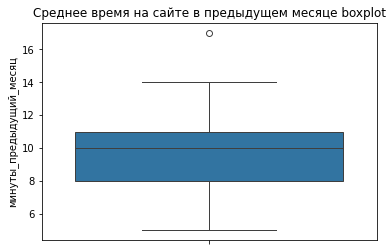

In [104]:
hist_box(segment_2['минуты_предыдущий_месяц'], bins=8, title='Среднее время на сайте в предыдущем месяце',
         xlabel='Время, мин', ylabel='Количество клиентов')

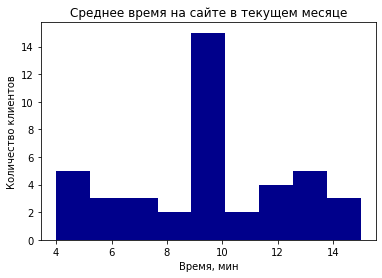

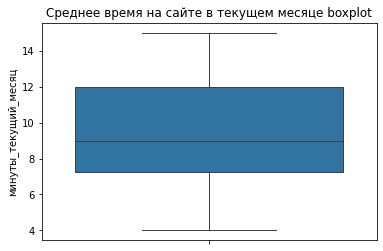

In [105]:
hist_box(segment_1['минуты_текущий_месяц'], bins=9, title='Среднее время на сайте в текущем месяце',
         xlabel='Время, мин', ylabel='Количество клиентов')

**В среднем клиенты из этого сегмента проводили больше времени на сайте, чем в текущем. И в целом меньше, чем по генеральной выборке.**

**Я бы порекомендовал магазину предложить клиентам из этого сегмента попробовать премиум сервис на выгодных условиях (например, первый месяц бесплатно). Это может повысить интерес клиентов к магазину. Также можно попробовать увеличить их интерес к сайту размещением таргетной рекламы своих товаров, подобно клиентам из первого сегмента.**

## Итоговые выводы <a class="anchor" id="chapter9"></a>

**Работа была связана с изучением предоставленных интернет-магазином данных о его клиентах. Данные были использованы для обучения различных моделей с целью прогнозирования вероятности снижения покупательской активности клиентов.   
В ходе работы:**
- Были открыты и рассмотрены предоставленные датасеты.
- Проведена предобработка данных, проверено отсутствие дубликатов и пропусков.
- Построены и изучены диаграммы для всех данных. Устранены проблемы с выбросами и аномалиями.
- Таблицы были предварительно преобразованы и объединены в единый датасет.
- Проведен корреляционный анализ данных. Исследованы взаимосвязи между признаками.
- С помощью пайплайна обучены 4 модели. C помощь метрики ROC-AUC выбрана лучшая модель - SVC. 
- Данная модель была применена для прогнозирования покупательской активности клиентов. 
- Был проведен анализ важности признаков для предсказаний. Самыми влиятельными оказались количество просматриваемых страниц и время, проводимое на сайте.
- Были выделены два сегмента клиентов с высоким риском снижения покупательской активности (премиум-клиенты и клиенты с высокой прибылью). 
- Был проведен исследовательский анализ данных в каждом из этих двух сегментов и даны рекомендации магазину о том, как можно было бы сохранить активность этих клиентов.

**Я бы порекомендовал магазину с целью сохранения активности клиентов разместить завлекающую, но не навязчивую рекламу своих же товаров из наиболее популярных категорий конкретного клиента. Это поднимет интерес покупателей, они станут просматривать больше страниц, больше времени проводить на сайте, а также, вероятно, совершать больше покупок по рекламным объявлениям. Кроме того можно предлагать премиум-клиентам персональные скидки по наиболее часто приобретаемым товарам и категориям. Чтобы удержать клиентов с высокой прибылью можно предложить им попробовать премиум сервис на выгодных условиях (например, первый месяц бесплатно). Это может повысить интерес клиентов к магазину.** 